<a href="https://colab.research.google.com/github/averma12/Kaggle/blob/master/Topic_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import os


In [12]:
! pip install kaggle

In [0]:
import json
token = {"removed"}

In [0]:
os.makedirs('/root/.kaggle/',exist_ok=True)

In [0]:
os.chmod()

In [0]:
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(token, file)

In [0]:
os.chmod('/root/.kaggle/kaggle.json',600)

In [0]:
os.makedirs('/content/topic_model/',exist_ok=True)

In [8]:
! kaggle competitions download -c spooky-author-identification -p /content/topic_model

  0% 0.00/29.4k [00:00<?, ?B/s]
100% 29.4k/29.4k [00:00<00:00, 12.0MB/s]
  0% 0.00/538k [00:00<?, ?B/s]
100% 538k/538k [00:00<00:00, 34.9MB/s]
  0% 0.00/1.26M [00:00<?, ?B/s]
100% 1.26M/1.26M [00:00<00:00, 79.5MB/s]


In [0]:
import pandas as pd
import nltk
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
! unzip /content/topic_model/train.zip

Archive:  /content/topic_model/train.zip
  inflating: train.csv               


In [0]:
df_train = pd.read_csv('/content/train.csv')

In [12]:
df_train.shape

(19579, 3)

In [13]:
df_train.head(10)

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL
5,id22965,"A youth passed in solitude, my best years spen...",MWS
6,id09674,"The astronomer, perhaps, at this point, took r...",EAP
7,id13515,The surcingle hung in ribands from my body.,EAP
8,id19322,I knew that you could not say to yourself 'ste...,EAP
9,id00912,I confess that neither the structure of langua...,MWS


In [14]:
df_train[(df_train.author == "EAP")].shape[0]

7900

In [15]:
df_train.author.value_counts().values

array([7900, 6044, 5635])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


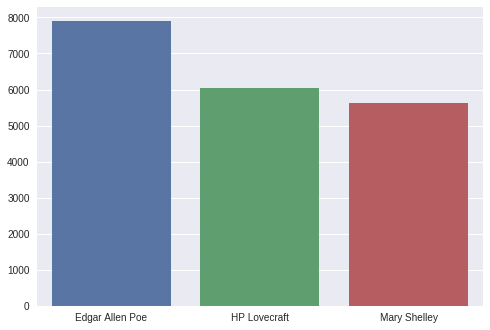

In [16]:
z = {'EAP': 'Edgar Allen Poe', 'MWS': 'Mary Shelley', 'HPL': 'HP Lovecraft'}
sns.barplot(data=df_train,x=df_train.author.map(z).unique(),y=df_train.author.value_counts().values)
plt.show()

In [17]:
word_counts = df_train.text.str.split(expand=True).unstack().value_counts()
type(word_counts)

pandas.core.series.Series

In [19]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
df_train["tokenize"] = df_train.text.apply(tokenizer.tokenize)
df_train.head()

,id,text,author,tokenize
0,id26305,"This process, however, afforded me no means of...",EAP,"[This, process, however, afforded, me, no, mea..."
1,id17569,It never once occurred to me that the fumbling...,HPL,"[It, never, once, occurred, to, me, that, the,..."
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,"[In, his, left, hand, was, a, gold, snuff, box..."
3,id27763,How lovely is spring As we looked from Windsor...,MWS,"[How, lovely, is, spring, As, we, looked, from..."
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,"[Finding, nothing, else, not, even, gold, the,..."


In [0]:
word_list = df_train.tokenize.tolist()


In [0]:
word_list_flattened = []
for sent in word_list:
  for word in sent:
    word_list_flattened.append(word)

In [0]:
from collections import Counter
sw = nltk.corpus.stopwords.words('english')
words_ns = [word for word in word_list_flattened if word.lower() not in sw]


In [0]:
#df_words = pd.DataFrame(Counter(words_ns),index=[0])


In [0]:
count_words = dict(Counter(words_ns))

In [0]:
df_words = pd.DataFrame(list(count_words.items()),columns=["words","count"])


In [46]:
desc = df_words.sort_values("count",ascending=False).reset_index()
desc.head()

,index,words,count
0,274,one,1623
1,435,upon,1411
2,131,could,1316
3,168,would,1241
4,362,man,779


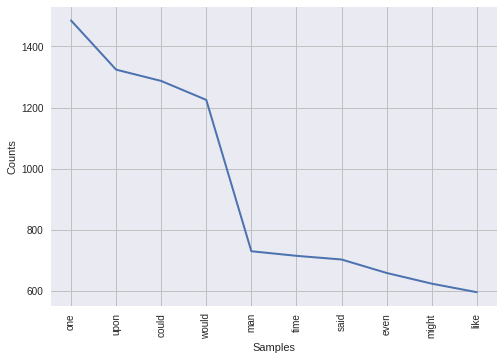

In [66]:
freqdist.plot(10)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


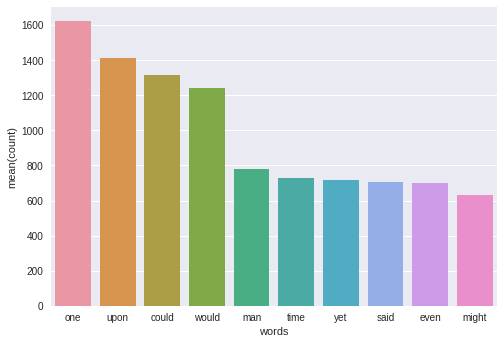

In [47]:
sns.barplot(data=desc.iloc[:10],x="words",y="count")
plt.show()

In [49]:
len(count_words.keys())

24944

In [0]:
#Create word2index and index2word
word2idx = {}
idx2word = {}

for index,word in enumerate(count_words.keys()):
  word2idx[word] = index
  idx2word[index] = word

In [51]:
word2idx.get("windsor",999999)
len(word2idx)

24944

In [52]:
#Replace each word in word list by their word2idx
for line in range(len(word_list)):
  stop_token  = [word.lower() for word in word_list[line] if word in count_words.keys()]
  word_list[line] = stop_token
word_list[0]


['process',
 'however',
 'afforded',
 'means',
 'ascertaining',
 'dimensions',
 'dungeon',
 'might',
 'make',
 'circuit',
 'return',
 'point',
 'whence',
 'set',
 'without',
 'aware',
 'fact',
 'perfectly',
 'uniform',
 'seemed',
 'wall']

In [53]:
vec_list = []
for line in range(len(word_list)):
  vec = [word2idx[word] for word in word_list[line]]
  vec_list.append(vec)
vec_list[2]

[26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 29, 38, 39, 40, 41, 42, 43]

**LDA**

In [0]:
#Implementing Dirichlet Algorithm
alpha = 0.2
beta = 0.01
#no of topics
K = 3
#length of vocabulary
V = len(count_words.keys())
#no of documents
D = len(vec_list)
# For practical implementation, we will generate the following three count matrices:
# 1) Word-Topic count matrix, 2) Topic-Document assignment matrix, 3) Document-Topic count matrix
word_topic_count = np.zeros((K,V))
# Initialize topic-document assignment matrix
topic_doc_assign = [np.zeros(len(sublist)) for sublist in vec_list]
# Initialize document-topic matrix
doc_topic_matrix = np.zeros((D,K))
#no of iterations
iter = 200

In [63]:
word_topic_count.shape

(3, 24944)

In [64]:
# Randomly assign topics to each word. Same word in different documents may be assigned
# the same topic as topic assignment is random
for doc in range(D):
  for word in range(len(vec_list[doc])):
    topic_doc_assign[doc][word] = np.random.choice(K,1)
    word_topic = int(topic_doc_assign[doc][word])
    word_doc_ID = vec_list[doc][word]
    word_topic_count[word_topic][word_doc_ID] += 1

print(f'Word-topic count matrix with random topic assignment: {word_topic_count}')

Word-topic count matrix with random topic assignment: [[  4. 132.  16. ...   1.   1.   0.]
 [  6.  97.   8. ...   0.   0.   0.]
 [  7. 129.  14. ...   0.   0.   1.]]


In [65]:
topic_doc_assign[0]
#sum(topic_doc_assign[0] == 0)

array([2., 2., 1., 1., 0., 2., 2., 1., 2., 0., 0., 0., 1., 2., 2., 2., 2.,
       2., 1., 2., 0.])

In [66]:
# Randomly assign topics to each document
for doc in range(D):
  for topic in range(K):
    topic_doc_vector = topic_doc_assign[doc]
    doc_topic_matrix[doc][topic] = sum(topic_doc_vector == topic)
    
print(f'doc-topic count matrix with random topic assignment first 5 docs: {doc_topic_matrix[0:5]}')
    

doc-topic count matrix with random topic assignment first 5 docs: [[ 5.  5. 11.]
 [ 1.  3.  2.]
 [ 5.  9.  5.]
 [ 9.  5.  7.]
 [10.  3.  3.]]


In [0]:
# Main part of the algorithm
for it in range(iter):
  for doc in range(D):
    for word in range(len(vec_list[doc])):
      init_topic_assign = int(topic_doc_assign[doc][word])
      word_id = vec_list[doc][word]
      doc_topic_matrix[doc][init_topic_assign] -= 1
      word_topic_count[init_topic_assign][word_id] -=1
      denom1 = sum(doc_topic_matrix[doc]) + K*alpha
      denom2 = np.sum(word_topic_count, axis = 1) + V*beta
      # Numerators, number of words assigned to a topic + prior dirichlet param
      numerator1 = [doc_topic_matrix[doc][col] for col in range(K)] 
      numerator1 = np.array(numerator1) + alpha
      numerator2 = [word_topic_count[row][word_id] for row in range(K)]
      numerator2 = np.array(numerator2) + beta
      
      prob_topics = (numerator1/denom1)*(numerator2/denom2)
      prob_topics = prob_topics/sum(prob_topics)
      update_topic_assign = np.random.choice(K,1,list(prob_topics))
      topic_doc_assign[doc][word] = update_topic_assign
      doc_topic_matrix[doc][init_topic_assign] += 1
      word_topic_count[init_topic_assign][word_id] +=1
      

In [0]:
theta = (doc_topic_matrix+alpha)
theta_row_sum = np.sum(theta, axis = 1)
theta = theta/theta_row_sum.reshape((D,1))

In [72]:
print(f'Subset of document-topic mixture matrix: {theta[0:3]}')

Subset of document-topic mixture matrix: [[0.24074074 0.24074074 0.51851852]
 [0.18181818 0.48484848 0.33333333]
 [0.26530612 0.46938776 0.26530612]]


In [73]:
df_train.text[0:3]

0    This process, however, afforded me no means of...
1    It never once occurred to me that the fumbling...
2    In his left hand was a gold snuff box, from wh...
Name: text, dtype: object

In [0]:
phi = (word_topic_count + beta)
phi_row_sum = np.sum(phi, axis = 1)
phi = phi/phi_row_sum.reshape((K,1))

In [75]:
print(f'Topic-word mixture matrix: {phi}')

Topic-word mixture matrix: [[4.67870701e-05 1.54023968e-03 1.86798252e-04 ... 1.17842745e-05
  1.17842745e-05 1.16675985e-07]
 [7.03257592e-05 1.13515839e-03 9.37286741e-05 ... 1.17014574e-07
  1.17014574e-07 1.17014574e-07]
 [8.19390065e-05 1.50798163e-03 1.63761124e-04 ... 1.16888740e-07
  1.16888740e-07 1.18057627e-05]]


In [0]:
list_dict_topics = []
for topic in range(K):
  mydict = {}
  for word in range(V):
    mydict[list(count_words.keys())[word]] = phi[topic][word]
  list_dict_topics.append(mydict)
    

In [83]:
sorted([(value,key) for (key,value) in list_dict_topics[2].items()])[::-1][10:40]

[(0.0024547804221647235, 'eyes'),
 (0.0024314026742273424, 'might'),
 (0.0022560695646969826, 'saw'),
 (0.002244380690728292, 'night'),
 (0.0022210029427909106, 'life'),
 (0.00220931406882222, 'us'),
 (0.00220931406882222, 'seemed'),
 (0.00220931406882222, 'never'),
 (0.00220931406882222, 'must'),
 (0.002174247446916148, 'still'),
 (0.002174247446916148, 'made'),
 (0.002139180825010076, 'first'),
 (0.0021274919510413854, 'like'),
 (0.0020690475811979323, 'little'),
 (0.0020573587072292413, 'many'),
 (0.0020573587072292413, 'every'),
 (0.0019872254634170977, 'well'),
 (0.0019521588415110256, 'day'),
 (0.0019404699675423349, 'came'),
 (0.0019287810935736443, 'long'),
 (0.0019287810935736443, 'found'),
 (0.0018937144716675723, 'great'),
 (0.0017885146059493564, 'ever'),
 (0.0016833147402311407, 'thought'),
 (0.0016833147402311407, 'much'),
 (0.00167162586626245, 'see'),
 (0.0016599369922937594, 'thus'),
 (0.0015781148745129248, 'two'),
 (0.0015781148745129248, 'may'),
 (0.0015664260005442

**Separate notebook testing regex functions**

In [4]:
import re
xx = "guru99education is fun"
r1 = re.findall(r"\w+",xx)
print(r1)

['guru99education', 'is', 'fun']


In [0]:
list = ["guru99g get", "guru99 give", "guru Selenium"]
for element in list:
    z = re.match("(g\w+)(g\w+)", element)
    if z:
      print(z.groups())

In [23]:
import nltk
from nltk.tokenize import word_tokenize,regexp_tokenize
nltk.download('punkt')
nltk.download('stopwords')
#Emoji and German language tokenization
german_text = "Wann gehen wir Pizza essen? 🍕 Und fährst du mit Über? 🚕"

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
all_words = word_tokenize(german_text)
print(all_words)

# Tokenize and print only capital words
capital_words = r"[A-ZÜÖÄ]\w+"
print(regexp_tokenize(german_text, capital_words))

# Tokenize and print only emoji
emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
print(regexp_tokenize(german_text, emoji))

['Wann', 'gehen', 'wir', 'Pizza', 'essen', '?', '🍕', 'Und', 'fährst', 'du', 'mit', 'Über', '?', '🚕']
['Wann', 'Pizza', 'Und', 'Über']
['🍕', '🚕']
